#**Builder**
O Builder é um padrão de projeto criacional que permite a você construir objetos complexos passo a passo. O padrão permite que você produza diferentes tipos e representações de um objeto usando o mesmo código de construção.

##Prós:

- Você pode construir objetos passo a passo, adiar as etapas de construção ou rodar etapas recursivamente.
- Você pode reutilizar o mesmo código de construção quando construindo várias representações de produtos.
- Princípio de responsabilidade única. Você pode isolar um código de construção complexo da lógica de negócio do produto.

##Contras:
- A complexidade geral do código aumenta uma vez que o padrão exige criar múltiplas classes novas.

##Quando adotar:

O padrão Builder pode ser aplicado quando a construção de várias representações do produto envolvem etapas similares que diferem apenas nos detalhes.
A interface base do builder define todas as etapas de construção possíveis, e os buildrs concretos implementam essas etapas para construir representações particulares do produto. Enquanto isso, a classe diretor guia a ordem de construção.

##UML:
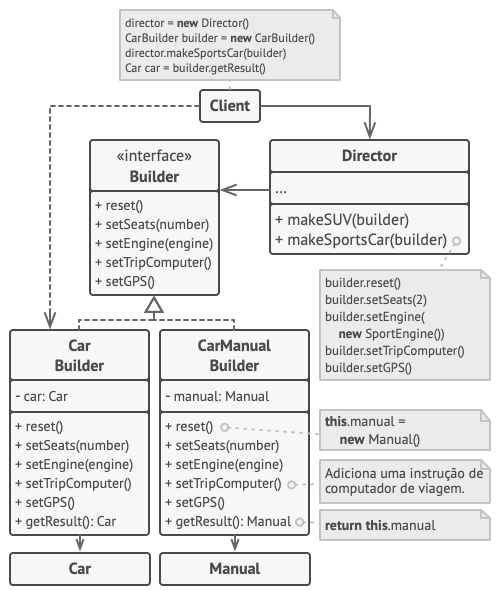

In [ ]:
from __future__ import annotations
from abc import ABC, abstractmethod
from typing import Any


class Builder(ABC):

    @property
    @abstractmethod
    def product(self) -> None:
        pass

    @abstractmethod
    def produce_part_a(self) -> None:
        pass

    @abstractmethod
    def produce_part_b(self) -> None:
        pass

    @abstractmethod
    def produce_part_c(self) -> None:
        pass


class ConcreteBuilder1(Builder):

    def __init__(self) -> None:
        
        self.reset()

    def reset(self) -> None:
        self._product = Product1()

    @property
    def product(self) -> Product1:

        product = self._product
        self.reset()
        return product

    def produce_part_a(self) -> None:
        self._product.add("PartA1")

    def produce_part_b(self) -> None:
        self._product.add("PartB1")

    def produce_part_c(self) -> None:
        self._product.add("PartC1")


class Product1():

    def __init__(self) -> None:
        self.parts = []

    def add(self, part: Any) -> None:
        self.parts.append(part)

    def list_parts(self) -> None:
        print(f"Product parts: {', '.join(self.parts)}", end="")


class Director:

    def __init__(self) -> None:
        self._builder = None

    @property
    def builder(self) -> Builder:
        return self._builder

    @builder.setter
    def builder(self, builder: Builder) -> None:
        
        self._builder = builder


    def build_minimal_viable_product(self) -> None:
        self.builder.produce_part_a()

    def build_full_featured_product(self) -> None:
        self.builder.produce_part_a()
        self.builder.produce_part_b()
        self.builder.produce_part_c()


if __name__ == "__main__":

    director = Director()
    builder = ConcreteBuilder1()
    director.builder = builder

    print("Standard basic product: ")
    director.build_minimal_viable_product()
    builder.product.list_parts()

    print("\n")

    print("Standard full featured product: ")
    director.build_full_featured_product()
    builder.product.list_parts()

    print("\n")

    print("Custom product: ")
    builder.produce_part_a()
    builder.produce_part_b()
    builder.product.list_parts()

Standard basic product: 
Product parts: PartA1

Standard full featured product: 
Product parts: PartA1, PartB1, PartC1

Custom product: 
Product parts: PartA1, PartB1

#**Decorator**
O Decorator é um padrão estrutural que permite adicionar novos comportamentos aos objetos dinamicamente, colocando-os dentro de objetos wrapper especiais. Podendo agrupar objetos inúmeras vezes, pois os objetos de destino e os decoradores seguem a mesma interface. O objeto resultante terá um comportamento de empilhamento de todos os wrappers.

##Prós:
- Você pode estender o comportamento de um objeto sem fazer um nova subclasse.
- Você pode adicionar ou remover responsabilidades de um objeto no momento da execução.
- Você pode combinar diversos comportamentos ao envolver o objeto com múltiplos decoradores.
- Princípio de responsabilidade única. Você pode dividir uma classe monolítica que implementa muitas possíveis variantes de um comportamento em diversas classes menores.

##Contras:
- É difícil remover um invólucro de uma pilha de invólucros.
- É difícil implementar um decorador de tal maneira que seu comportamento não dependa da ordem do pilha de decoradores.
- A configuração inicial do código de camadas pode ficar bastante feia.

##Quando adotar:
Utilize o padrão quando é complicado ou impossível estender o comportamento de um objeto usando herança. Muitas linguagens de programação tem a palavra chave final que pode ser usada para prevenir a extensão de uma classe. Para uma classe final, a única maneira de reutilizar seu comportamento existente seria envolver a classe com seu próprio invólucro usando o padrão Decorator.

##UML:
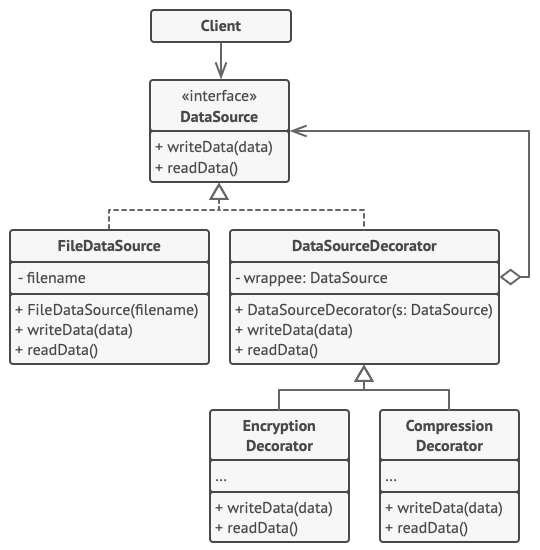

In [ ]:
class Component():

    def operation(self) -> str:
        pass


class ConcreteComponent(Component):

    def operation(self) -> str:
        return "ConcreteComponent"


class Decorator(Component):

    _component: Component = None

    def __init__(self, component: Component) -> None:
        self._component = component

    @property
    def component(self) -> str:

        return self._component

    def operation(self) -> str:
        return self._component.operation()


class ConcreteDecoratorA(Decorator):

    def operation(self) -> str:

        return f"ConcreteDecoratorA({self.component.operation()})"


class ConcreteDecoratorB(Decorator):

    def operation(self) -> str:
        return f"ConcreteDecoratorB({self.component.operation()})"


def client_code(component: Component) -> None:

    print(f"RESULT: {component.operation()}", end="")


if __name__ == "__main__":
    simple = ConcreteComponent()
    print("Client: I've got a simple component:")
    client_code(simple)
    print("\n")

    decorator1 = ConcreteDecoratorA(simple)
    decorator2 = ConcreteDecoratorB(decorator1)
    print("Client: Now I've got a decorated component:")
    client_code(decorator2)

Client: I've got a simple component:
RESULT: ConcreteComponent

Client: Now I've got a decorated component:
RESULT: ConcreteDecoratorB(ConcreteDecoratorA(ConcreteComponent))

#**Composite**
O Composite é um padrão de projeto estrutural que permite que você componha objetos em estruturas de árvores e então trabalhe com essas estruturas como se elas fossem objetos individuais.

##Prós:
- Você pode trabalhar com estruturas de árvore complexas mais convenientemente: utilize o polimorfismo e a recursão a seu favor.
- Princípio aberto/fechado. Você pode introduzir novos tipos de elemento na aplicação sem quebrar o código existente, o que agora funciona com a árvore de objetos.

##Contras: 
- Pode ser difícil providenciar uma interface comum para classes cuja funcionalidade difere muito. Em certos cenários, você precisaria generalizar muito a interface componente, fazendo dela uma interface de difícil compreensão.

##Quando adotar:
Utilize o padrão Composite quando você tem que implementar uma estrutura de objetos tipo árvore. O padrão Composite fornece a você com dois tipos básicos de elementos que compartilham uma interface comum: folhas simples e contêineres complexos. Um contêiner pode ser composto tanto de folhas como por outros contêineres. Isso permite a você construir uma estrutura de objetos recursiva aninhada que se assemelha a uma árvore.

##UML:
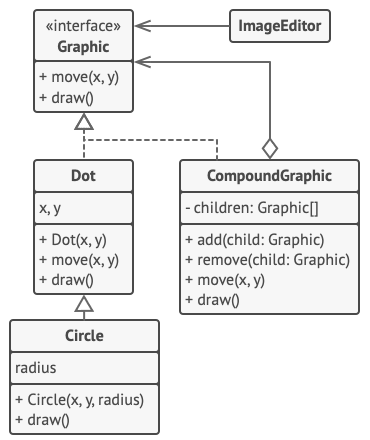

In [ ]:
from __future__ import annotations
from abc import ABC, abstractmethod
from typing import List


class Component(ABC):

    @property
    def parent(self) -> Component:
        return self._parent

    @parent.setter
    def parent(self, parent: Component):

        self._parent = parent


    def add(self, component: Component) -> None:
        pass

    def remove(self, component: Component) -> None:
        pass

    def is_composite(self) -> bool:

        return False

    @abstractmethod
    def operation(self) -> str:

        pass


class Leaf(Component):

    def operation(self) -> str:
        return "Leaf"


class Composite(Component):

    def __init__(self) -> None:
        self._children: List[Component] = []


    def add(self, component: Component) -> None:
        self._children.append(component)
        component.parent = self

    def remove(self, component: Component) -> None:
        self._children.remove(component)
        component.parent = None

    def is_composite(self) -> bool:
        return True

    def operation(self) -> str:

        results = []
        for child in self._children:
            results.append(child.operation())
        return f"Branch({'+'.join(results)})"


def client_code(component: Component) -> None:

    print(f"RESULT: {component.operation()}", end="")


def client_code2(component1: Component, component2: Component) -> None:

    if component1.is_composite():
        component1.add(component2)

    print(f"RESULT: {component1.operation()}", end="")


if __name__ == "__main__":
    simple = Leaf()
    print("Client: I've got a simple component:")
    client_code(simple)
    print("\n")

    tree = Composite()

    branch1 = Composite()
    branch1.add(Leaf())
    branch1.add(Leaf())

    branch2 = Composite()
    branch2.add(Leaf())

    tree.add(branch1)
    tree.add(branch2)

    print("Client: Now I've got a composite tree:")
    client_code(tree)
    print("\n")

    print("Client: I don't need to check the components classes even when managing the tree:")
    client_code2(tree, simple)

Client: I've got a simple component:
RESULT: Leaf

Client: Now I've got a composite tree:
RESULT: Branch(Branch(Leaf+Leaf)+Branch(Leaf))

Client: I don't need to check the components classes even when managing the tree:
RESULT: Branch(Branch(Leaf+Leaf)+Branch(Leaf)+Leaf)

#**Mediator**
O Mediator é um padrão de projeto comportamental que permite que você reduza as dependências caóticas entre objetos. O padrão restringe comunicações diretas entre objetos e os força a colaborar apenas através do objeto mediador.

##Prós:
- Princípio de responsabilidade única. Você pode extrair as comunicações entre vários componentes para um único lugar, tornando as de mais fácil entendimento e manutenção.
- Princípio aberto/fechado. Você pode introduzir novos mediadores sem ter que mudar os próprios componentes.
- Você pode reduzir o acoplamento entre os vários componentes de um programa.
- Você pode reutilizar componentes individuais mais facilmente.

##Contras:
- Com o tempo um mediador pode evoluir para um Objeto Deus.

##Quando adotar:
Utilize o padrão Mediator quando é difícil mudar algumas das classes porque elas estão firmemente acopladas a várias outras classes. O padrão lhe permite extrair todas as relações entre classes para uma classe separada, isolando quaisquer mudanças para um componente específico do resto dos componentes.

##UML:
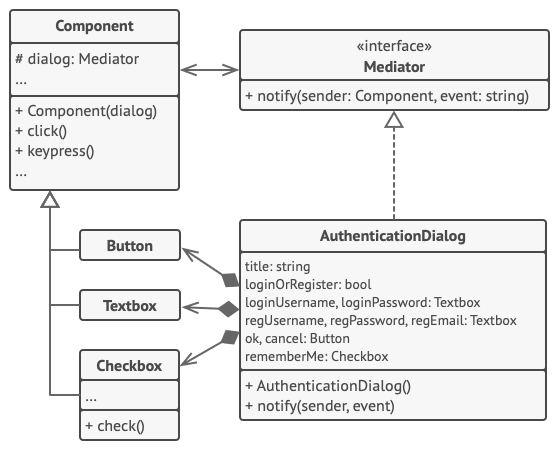

In [ ]:
from __future__ import annotations
from abc import ABC


class Mediator(ABC):

    def notify(self, sender: object, event: str) -> None:
        pass


class ConcreteMediator(Mediator):
    def __init__(self, component1: Component1, component2: Component2) -> None:
        self._component1 = component1
        self._component1.mediator = self
        self._component2 = component2
        self._component2.mediator = self

    def notify(self, sender: object, event: str) -> None:
        if event == "A":
            print("Mediator reacts on A and triggers following operations:")
            self._component2.do_c()
        elif event == "D":
            print("Mediator reacts on D and triggers following operations:")
            self._component1.do_b()
            self._component2.do_c()


class BaseComponent:

    def __init__(self, mediator: Mediator = None) -> None:
        self._mediator = mediator

    @property
    def mediator(self) -> Mediator:
        return self._mediator

    @mediator.setter
    def mediator(self, mediator: Mediator) -> None:
        self._mediator = mediator


class Component1(BaseComponent):
    def do_a(self) -> None:
        print("Component 1 does A.")
        self.mediator.notify(self, "A")

    def do_b(self) -> None:
        print("Component 1 does B.")
        self.mediator.notify(self, "B")


class Component2(BaseComponent):
    def do_c(self) -> None:
        print("Component 2 does C.")
        self.mediator.notify(self, "C")

    def do_d(self) -> None:
        print("Component 2 does D.")
        self.mediator.notify(self, "D")


if __name__ == "__main__":
    c1 = Component1()
    c2 = Component2()
    mediator = ConcreteMediator(c1, c2)

    print("Client triggers operation A.")
    c1.do_a()

    print("\n", end="")

    print("Client triggers operation D.")
    c2.do_d()

Client triggers operation A.
Component 1 does A.
Mediator reacts on A and triggers following operations:
Component 2 does C.

Client triggers operation D.
Component 2 does D.
Mediator reacts on D and triggers following operations:
Component 1 does B.
Component 2 does C.


#**Bridge**
O Bridge é um padrão de projeto estrutural que permite que você divida uma classe grande ou um conjunto de classes intimamente ligadas em duas hierarquias separadas—abstração e implementação—que podem ser desenvolvidas independentemente umas das outras.

##Prós:
- Você pode criar classes e aplicações independentes de plataforma.
- O código cliente trabalha com abstrações em alto nível. Ele não fica exposto a detalhes de plataforma.
- Princípio aberto/fechado. Você pode introduzir novas abstrações e implementações independentemente uma das outras.
- Princípio de responsabilidade única. Você pode focar na lógica de alto nível na abstração e em detalhes de plataforma na implementação.

##Contras:
- Você pode tornar o código mais complicado ao aplicar o padrão em uma classe altamente coesa.

##Quando adotar:
Utilize o padrão quando você precisa estender uma classe em diversas dimensões ortogonais (independentes). O Bridge sugere que você extraia uma hierarquia de classe separada para cada uma das dimensões. A classe original delega o trabalho relacionado para os objetos pertencentes àquelas hierarquias ao invés de fazer tudo por conta própria.

##UML:
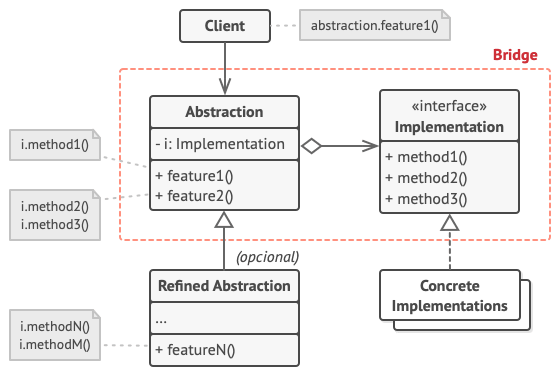

In [ ]:
from __future__ import annotations
from abc import ABC, abstractmethod


class Abstraction:

    def __init__(self, implementation: Implementation) -> None:
        self.implementation = implementation

    def operation(self) -> str:
        return (f"Abstraction: Base operation with:\n"
                f"{self.implementation.operation_implementation()}")


class ExtendedAbstraction(Abstraction):

    def operation(self) -> str:
        return (f"ExtendedAbstraction: Extended operation with:\n"
                f"{self.implementation.operation_implementation()}")


class Implementation(ABC):

    @abstractmethod
    def operation_implementation(self) -> str:
        pass


class ConcreteImplementationA(Implementation):
    def operation_implementation(self) -> str:
        return "ConcreteImplementationA: Here's the result on the platform A."


class ConcreteImplementationB(Implementation):
    def operation_implementation(self) -> str:
        return "ConcreteImplementationB: Here's the result on the platform B."


def client_code(abstraction: Abstraction) -> None:

    print(abstraction.operation(), end="")


if __name__ == "__main__":

    implementation = ConcreteImplementationA()
    abstraction = Abstraction(implementation)
    client_code(abstraction)

    print("\n")

    implementation = ConcreteImplementationB()
    abstraction = ExtendedAbstraction(implementation)
    client_code(abstraction)

Abstraction: Base operation with:
ConcreteImplementationA: Here's the result on the platform A.

ExtendedAbstraction: Extended operation with:
ConcreteImplementationB: Here's the result on the platform B.

#**Flyweight**
O Flyweight é um padrão de projeto estrutural que permite a você colocar mais objetos na quantidade de RAM disponível ao compartilhar partes comuns de estado entre os múltiplos objetos ao invés de manter todos os dados em cada objeto.

##Prós:
- Você pode economizar muita RAM, desde que seu programa tenha muitos objetos similares.

##Contras:
- Você pode estar trocando RAM por ciclos de CPU quando parte dos dados de contexto precisa ser recalculado cada vez que alguém chama um método flyweight.
- O código fica muito mais complicado. Novos membros de equipe sempre se perguntarão por que o estado de uma entidade foi separado de tal forma.

##Quando adotar:
Utilize o padrão Flyweight apenas quando seu programa deve suportar um grande número de objetos que mal cabem na RAM disponível. O benefício de aplicar o padrão depende muito de como e onde ele é usado. Ele é mais útil quando:
- Uma aplicação precisa gerar um grande número de objetos similares;
- Isso drena a RAM disponível no dispositivo alvo;
- Os objetos contém estados duplicados que podem ser extraídos e compartilhados entre múltiplos objetos.

##UML:
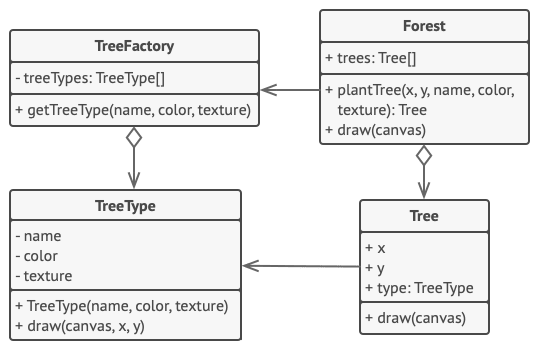

In [ ]:
import json
from typing import Dict


class Flyweight():

    def __init__(self, shared_state: str) -> None:
        self._shared_state = shared_state

    def operation(self, unique_state: str) -> None:
        s = json.dumps(self._shared_state)
        u = json.dumps(unique_state)
        print(f"Flyweight: Displaying shared ({s}) and unique ({u}) state.", end="")


class FlyweightFactory():

    _flyweights: Dict[str, Flyweight] = {}

    def __init__(self, initial_flyweights: Dict) -> None:
        for state in initial_flyweights:
            self._flyweights[self.get_key(state)] = Flyweight(state)

    def get_key(self, state: Dict) -> str:

        return "_".join(sorted(state))

    def get_flyweight(self, shared_state: Dict) -> Flyweight:

        key = self.get_key(shared_state)

        if not self._flyweights.get(key):
            print("FlyweightFactory: Can't find a flyweight, creating new one.")
            self._flyweights[key] = Flyweight(shared_state)
        else:
            print("FlyweightFactory: Reusing existing flyweight.")

        return self._flyweights[key]

    def list_flyweights(self) -> None:
        count = len(self._flyweights)
        print(f"FlyweightFactory: I have {count} flyweights:")
        print("\n".join(map(str, self._flyweights.keys())), end="")


def add_car_to_police_database(
    factory: FlyweightFactory, plates: str, owner: str,
    brand: str, model: str, color: str
) -> None:
    print("\n\nClient: Adding a car to database.")
    flyweight = factory.get_flyweight([brand, model, color])
    flyweight.operation([plates, owner])


if __name__ == "__main__":

    factory = FlyweightFactory([
        ["Chevrolet", "Camaro2018", "pink"],
        ["Mercedes Benz", "C300", "black"],
        ["Mercedes Benz", "C500", "red"],
        ["BMW", "M5", "red"],
        ["BMW", "X6", "white"],
    ])

    factory.list_flyweights()

    add_car_to_police_database(
        factory, "CL234IR", "James Doe", "BMW", "M5", "red")

    add_car_to_police_database(
        factory, "CL234IR", "James Doe", "BMW", "X1", "red")

    print("\n")

    factory.list_flyweights()

FlyweightFactory: I have 5 flyweights:
Camaro2018_Chevrolet_pink
C300_Mercedes Benz_black
C500_Mercedes Benz_red
BMW_M5_red
BMW_X6_white

Client: Adding a car to database.
FlyweightFactory: Reusing existing flyweight.
Flyweight: Displaying shared (["BMW", "M5", "red"]) and unique (["CL234IR", "James Doe"]) state.

Client: Adding a car to database.
FlyweightFactory: Can't find a flyweight, creating new one.
Flyweight: Displaying shared (["BMW", "X1", "red"]) and unique (["CL234IR", "James Doe"]) state.

FlyweightFactory: I have 6 flyweights:
Camaro2018_Chevrolet_pink
C300_Mercedes Benz_black
C500_Mercedes Benz_red
BMW_M5_red
BMW_X6_white
BMW_X1_red

#**Visitor**
O Visitor é um padrão de projeto comportamental que permite que você separe algoritmos dos objetos nos quais eles operam.

##Prós:
- Princípio aberto/fechado. Você pode introduzir um novo comportamento que pode funcionar com objetos de diferentes classes sem mudar essas classes.
- Princípio de responsabilidade única. Você pode mover múltiplas versões do mesmo comportamento para dentro da mesma classe.
- Um objeto visitante pode acumular algumas informações úteis enquanto trabalha com vários objetos. Isso pode ser interessante quando você quer percorrer algum objeto de estrutura complexa, tais como um objeto árvore, e aplicar o visitante para cada objeto da estrutura.

##Contras:
- Você precisa atualizar todos os visitantes a cada vez que a classe é adicionada ou removida da hierarquia de elementos.
- Visitantes podem não ter seu acesso permitido para campos e métodos privados dos elementos que eles deveriam estar trabalhando.

##Quando adotar:
Utilize o Visitor quando você precisa fazer uma operação em todos os elementos de uma estrutura de objetos complexa (por exemplo, uma árvore de objetos). O padrão Visitor permite que você execute uma operação sobre um conjunto de objetos com diferentes classes ao ter o objeto visitante implementando diversas variantes da mesma operação, que correspondem a todas as classes alvo.

##UML:
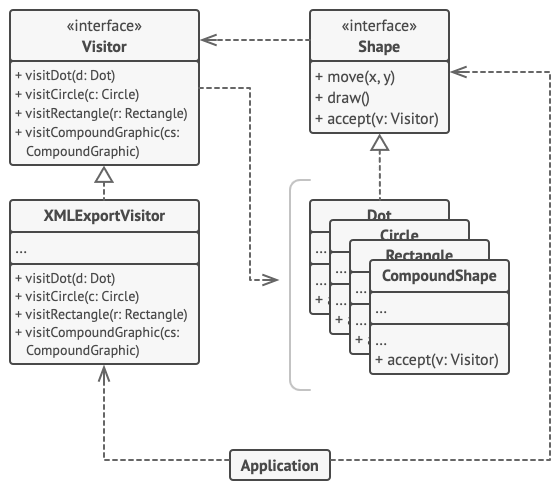

In [ ]:
from __future__ import annotations
from abc import ABC, abstractmethod
from typing import List


class Component(ABC):

    @abstractmethod
    def accept(self, visitor: Visitor) -> None:
        pass


class ConcreteComponentA(Component):

    def accept(self, visitor: Visitor) -> None:

        visitor.visit_concrete_component_a(self)

    def exclusive_method_of_concrete_component_a(self) -> str:
        return "A"


class ConcreteComponentB(Component):

    def accept(self, visitor: Visitor):
        visitor.visit_concrete_component_b(self)

    def special_method_of_concrete_component_b(self) -> str:
        return "B"


class Visitor(ABC):

    @abstractmethod
    def visit_concrete_component_a(self, element: ConcreteComponentA) -> None:
        pass

    @abstractmethod
    def visit_concrete_component_b(self, element: ConcreteComponentB) -> None:
        pass


class ConcreteVisitor1(Visitor):
    def visit_concrete_component_a(self, element) -> None:
        print(f"{element.exclusive_method_of_concrete_component_a()} + ConcreteVisitor1")

    def visit_concrete_component_b(self, element) -> None:
        print(f"{element.special_method_of_concrete_component_b()} + ConcreteVisitor1")


class ConcreteVisitor2(Visitor):
    def visit_concrete_component_a(self, element) -> None:
        print(f"{element.exclusive_method_of_concrete_component_a()} + ConcreteVisitor2")

    def visit_concrete_component_b(self, element) -> None:
        print(f"{element.special_method_of_concrete_component_b()} + ConcreteVisitor2")


def client_code(components: List[Component], visitor: Visitor) -> None:
    for component in components:
        component.accept(visitor)


if __name__ == "__main__":
    components = [ConcreteComponentA(), ConcreteComponentB()]

    print("The client code works with all visitors via the base Visitor interface:")
    visitor1 = ConcreteVisitor1()
    client_code(components, visitor1)

    print("It allows the same client code to work with different types of visitors:")
    visitor2 = ConcreteVisitor2()
    client_code(components, visitor2)

The client code works with all visitors via the base Visitor interface:
A + ConcreteVisitor1
B + ConcreteVisitor1
It allows the same client code to work with different types of visitors:
A + ConcreteVisitor2
B + ConcreteVisitor2
